# Derivas de concepto en la cadena de bloques. Método DummyDriftDetector

Detección de derivas de concepto en la cadena de bloques, a partir del método DummyDriftDetector, con salida gráfica.

In [1]:
!pip install river

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from btc_connect import btc_connect
from river import drift
import datetime, matplotlib.pyplot as plt

In [3]:
# Conección al nodo local
rpc_connection = btc_connect()

In [4]:
# Intervalo de bloques
start = 850000 # Inicio: 0 
end = 854499 # Para último bloque de la cadena: rpc_connection.getblockcount() 

In [5]:
# Adaptación de función para graficar el total de transacciones por bloque y las derivas de concepto detectadas
# https://riverml.xyz/latest/introduction/getting-started/concept-drift-detection/
def plot_transaction(x, y, xlabel, drift=None):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, color="greenyellow", label="transacciones")
    ax.set_ylim(bottom=0)
    ax.set_title("Número de transacciones por bloque")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Transacciones")
    if drift is not None:
        legend=0
        for drift_detected in drift:
            if legend==0:
                ax.axvline(drift_detected, color="red", linestyle=":", label="derivas de concepto")
                legend=1
            else:
                ax.axvline(drift_detected, color="red", linestyle=":")
    fig.legend(loc="outside upper left")
    plt.show()

In [6]:
block_number = []
transactions = []

# DummyDriftDetector Valores por defecto:
# https://riverml.xyz/dev/api/drift/DummyDriftDetector/
# trigger_method=fixed  -> Método de activación (fijo o aleatorio)
# t_0=300               -> Punto de referencia para definir disparadores
# w=0                   -> Parámetro auxiliar: Si la activación es fija, las señales de deriva sólo comenzarán después de un período aleatorio definido
#                          entre [0,w]. Si la activación es aleatoria (random), w define los límites de probabilidad de desencadenar una deriva
# dynamic_cloning=False -> Determina si deben cambiarse los valores de w y seed cada vez que se clone el disparador
# seed=None             -> Semilla aleatoria (una misma semilla genera los mismos valores aleatorios, con el fin de conseguir reproducibilidad)

# The 'w' value must be greater than zero when 'trigger_method' is 'random'
drift_detector = drift.DummyDriftDetector(trigger_method="random", t_0=500, w=100)

block_drift = []  # Bloques en los que se detecta una deriva de concepto
block_transactions_drift = []  # Total de transacciones de dichos bloques
block_datetime_drift = []  # Marca temporal de los bloques

for i in range (start, end + 1):
    blockhash = rpc_connection.getblockhash(i)  # Obtiene el hash del bloque
    block = rpc_connection.getblock(blockhash)  # Obtiene el bloque
    block_number.append(i)
    transactions.append(block["nTx"])  # Número de transacciones del bloque

    drift_detector.update(block["nTx"])
    if drift_detector.drift_detected:  # Deriva de concepto detectada
        block_drift.append(i)
        block_transactions_drift.append(block["nTx"])
        block_datetime_drift.append(datetime.datetime.fromtimestamp(block["time"]))

xlabel = f"Bloques: {start} a {end}"

### Derivas de concepto detectadas

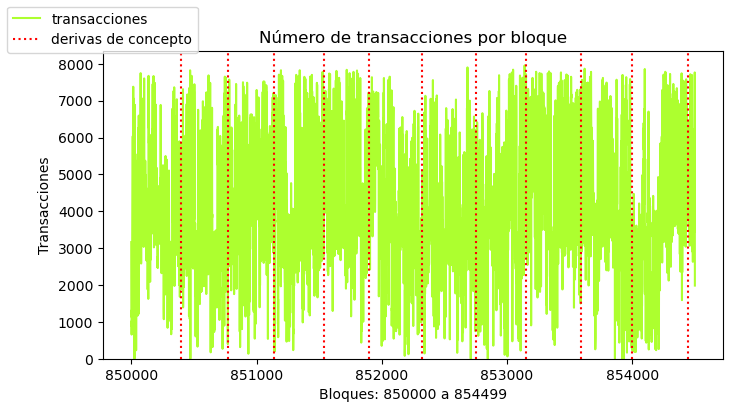

In [7]:
plot_transaction(block_number, transactions, xlabel, block_drift)

### Bloque de comienzo, número de transacciones y marca temporal de minado

In [8]:
for x, y, z in (zip(block_drift, block_transactions_drift, block_datetime_drift)):
    print(f"Bloque {x}: {y} transacciones - {z.strftime('%d/%m/%Y %H:%M:%S')}")

Bloque 850397: 2816 transacciones - 02/07/2024 16:54:43
Bloque 850771: 397 transacciones - 05/07/2024 08:06:51
Bloque 851142: 2984 transacciones - 07/07/2024 22:34:18
Bloque 851537: 3985 transacciones - 10/07/2024 13:35:03
Bloque 851898: 5369 transacciones - 13/07/2024 01:39:10
Bloque 852321: 5094 transacciones - 15/07/2024 16:58:01
Bloque 852753: 3401 transacciones - 18/07/2024 17:00:02
Bloque 853150: 6343 transacciones - 21/07/2024 05:52:19
Bloque 853588: 5167 transacciones - 23/07/2024 18:49:44
Bloque 854000: 227 transacciones - 26/07/2024 09:58:40
Bloque 854441: 6324 transacciones - 29/07/2024 07:04:10
